In [1]:
# Proyección COVID-19 Perú

Velocidad Primera:  1.82
Velocidad Segunda Curva:  1.73


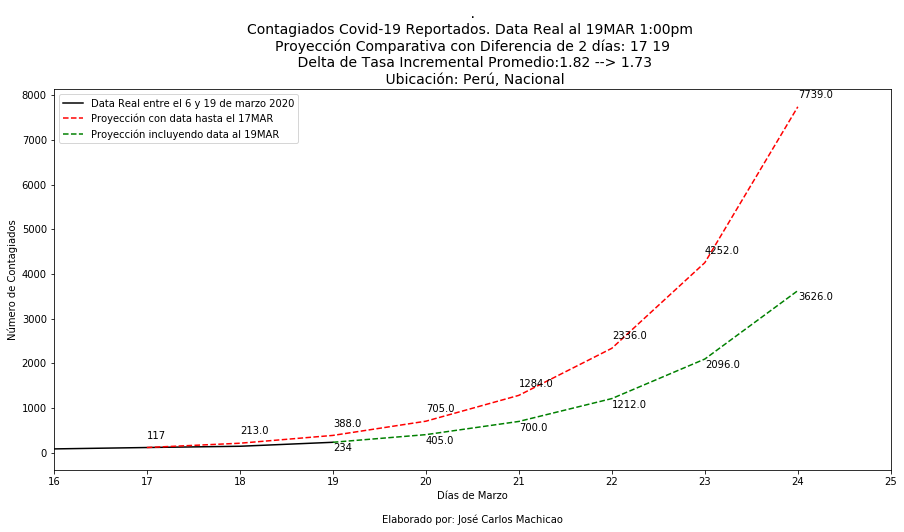

In [3]:
import datetime
import matplotlib.pyplot as plt

horiz = 5
dhoy = 19
dbas = dhoy-2
sp = 20

# Gráfica básica de datos reales
plt.figure(figsize=(15,7))
data =    [1, 6, 7, 9, 11, 17, 22, 38, 43, 71, 86, 117, 145, 234]
fechas =  [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,  17,  18,  19]
plt.plot(fechas, data, 'k-', label='Data Real entre el ' + str(fechas[0]) + ' y ' + str(fechas[-1]) + ' de marzo 2020')
#for i, j in zip(fechas, data):
#    plt.text(i, j-10*sp, str(j), fontsize=12)
    
# Cálculo de velocidad de incremento promedio
velos1 = []
for j in range(1, len(data)-3):
    velos1.append(data[j]/data[j-1])
vprom1 = round(sum(velos1)/len(velos1),2)
print('Velocidad Primera: ', vprom1)

# Cálculo de curva proyectada dos días atrás
rt_sds = vprom1
data2 = [data[-3]]

for i in range(dbas, dbas+horiz+2):
    base = data2[i-dbas]
    proy = base*rt_sds
    data2.append(round(proy,2))

fechas2 = list(range(dbas, dbas+horiz+3))
plt.plot(fechas2, data2, 'r--', label='Proyección con data hasta el ' + str(dbas) + 'MAR')
for i, j in zip(fechas2, data2):
    plt.text(i, j+10*sp, str(round(j,0)))

#Cálculo de curva proyectada de hoy en adelante
velos2 = []
for j in range(1, len(data)):
    velos2.append(data[j]/data[j-1])
vprom2 = round(sum(velos2)/len(velos2),2)
print('Velocidad Segunda Curva: ', vprom2)

rt_sds = vprom2
data3 = [data[-1]]
fechas3 = list(range(dhoy, dhoy+horiz+1))
for i in range(dhoy, dhoy+horiz):
    base = data3[i-dhoy]
    proy = base*rt_sds
    data3.append(round(proy,2))
plt.plot(fechas3, data3, 'g--', label='Proyección incluyendo data al ' + str(dhoy) + 'MAR')

for i, j in zip(fechas3, data3):
    plt.text(i, j-10*sp, str(round(j,0)))
'''    
plt.text(dhoy-2.9, 3000, 
         'Nota: \nEsta es una proyección comparada entre el día actual y dos días atrás.\n'
         + 'No es un modelo predictivo. Sólo es útil para pocos días posteriores \n' 
         + 'al último día de data real oficial disponible. \n'
         + 'Está basada en la información pública acerca de los casos identificados. \n'
         + 'No descarta la existencia de casos que puedan ser desconocidos. \n'
         + 'Medológicamente es una simple regresión lineal logarítimica proyectada\n'
         + 'para la fecha actual y dos días anteriores.\n'
         + 'Su utilidad actual es la previsión de recursos para los días siguientes y la \n'
         + 'verificación de incremento o reducción de la velocidad de contagio. \n'
         + 'Afortunadamente hasta el momento todas han sido reducciones.')
'''

# Ploteo General
plt.legend()
#plt.yscale('symlog')
plt.xlabel('Días de Marzo'+'\n'+'\nElaborado por: José Carlos Machicao')
#plt.ylim(30,150000)
plt.xlim(dbas-1, dhoy+horiz+1)
plt.ylabel('Número de Contagiados') #Opcional: Escala Logaritmica Decimal
plt.title(
    ' . \nContagiados Covid-19 Reportados. Data Real al '+str(dhoy)+'MAR 1:00pm \n'
    + 'Proyección Comparativa con Diferencia de 2 días: '+str(dhoy-2)+' '+str(dhoy)      
    + '\n Delta de Tasa Incremental Promedio:' + str(vprom1) + ' --> ' + str(vprom2)
    + '\n Ubicación: Perú, Nacional', 
    fontsize=14)
plt.show()